In [48]:
from fastai import *
from fastai.text import *
import pandas as pd
from tqdm import tqdm
from fastai.callbacks.tracker import *

In [49]:
dir_pth = Path('./')

In [50]:
train_pth = dir_pth / 'train.csv'

In [51]:
test_pth = dir_pth / 'test.csv'

In [52]:
train_data = pd.read_csv(train_pth)

In [53]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [54]:
test_data = pd.read_csv(test_pth)

In [55]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [56]:
train_data.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', ..., 'wounds', 'wreck', 'wreckage', 'wrecked'], dtype=object)

In [57]:
train_data.location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', 'AFRICA', ..., '#NewcastleuponTyne #UK',
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [58]:
train_data.target.unique()

array([1, 0])

# 只用text来进行判断尝试

In [59]:
text = pd.concat([train_data[['id', 'text']], test_data[['id', 'text']]], axis=0)

In [60]:
text.head()

,id,text
0,1,Our Deeds are the Reason of this #earthquake M...
1,4,Forest fire near La Ronge Sask. Canada
2,5,All residents asked to 'shelter in place' are ...
3,6,"13,000 people receive #wildfires evacuation or..."
4,7,Just got sent this photo from Ruby #Alaska as ...


In [61]:
assert len(text) == len(train_data) + len(test_data)

In [62]:
text.to_csv('text.csv', index=None)

In [63]:
data_lm = TextLMDataBunch.from_csv(dir_pth, 'text.csv', text_cols=1, label_cols=0)

In [64]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=1)
learn.callbacks.append(EarlyStoppingCallback(learn, patience = 10))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 5.25E-02


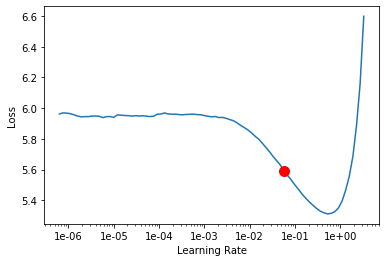

In [65]:
learn.lr_find();learn.recorder.plot(suggestion = True)

In [66]:
learn.fit_one_cycle(100, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.173929,4.227953,0.331885,00:05
1,4.568038,3.730512,0.379928,00:05
2,4.152972,3.506199,0.402661,00:05
3,3.851606,3.353625,0.422802,00:05
4,3.630903,3.251747,0.435113,00:05
5,3.427743,3.168539,0.445896,00:05
6,3.259858,3.120778,0.452335,00:05
7,3.109029,3.089926,0.458499,00:06
8,3.013727,3.090643,0.459444,00:06
9,2.914305,3.093919,0.461229,00:09


Epoch 18: early stopping


In [69]:
learn.callbacks.append(SaveModelCallback(learn, monitor='accuracy'))
learn.unfreeze()
learn.fit_one_cycle(100, 1e-2, wd = 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,2.367440,3.147998,0.478348,00:33
1,2.309863,3.129632,0.483620,00:48
2,2.220500,3.121608,0.485577,00:56
3,2.127625,3.127086,0.488616,00:55
4,2.071890,3.131075,0.490419,00:56
5,1.989892,3.144920,0.491295,00:57
6,1.906401,3.168906,0.492016,00:57
7,1.827848,3.190956,0.494008,00:57
8,1.749057,3.208365,0.493561,00:57
9,1.675212,3.279721,0.492994,00:57


Better model found at epoch 0 with accuracy value: 0.4783481955528259.
Better model found at epoch 0 with accuracy value: 0.4783481955528259.
Better model found at epoch 0 with accuracy value: 0.4783481955528259.
Better model found at epoch 1 with accuracy value: 0.4836195111274719.
Better model found at epoch 1 with accuracy value: 0.4836195111274719.
Better model found at epoch 1 with accuracy value: 0.4836195111274719.
Better model found at epoch 2 with accuracy value: 0.48557692766189575.
Better model found at epoch 2 with accuracy value: 0.48557692766189575.
Better model found at epoch 2 with accuracy value: 0.48557692766189575.
Better model found at epoch 3 with accuracy value: 0.48861610889434814.
Better model found at epoch 3 with accuracy value: 0.48861610889434814.
Better model found at epoch 3 with accuracy value: 0.48861610889434814.
Better model found at epoch 4 with accuracy value: 0.49041903018951416.
Better model found at epoch 4 with accuracy value: 0.49041903018951416

In [70]:
learn.load('bestmodel')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (8700 items)
x: LMTextList
xxbos # xxmaj thorium xxmaj radioactive xxmaj weapons . xxmaj xxunk murders and environmental devastation : - xxup video http : / / t.co / xxunk,xxbos @_minimehh @cjoyner i must be overlooking the burning buildings ? # blacklivesmatter,xxbos xxmaj economic xxmaj collapse xxmaj xxunk : xxmaj specific actions and xxunk to securing lasting wealth from the financial blowout . http : / / t.co / xxunk,xxbos xxunk we will never know what would have happened but the govt seemed to think that their xxunk xxunk the deaths of innocent xxunk,xxbos xxmaj first xxmaj responders xxmaj xxunk for xxmaj national xxmaj summit and xxmaj xxunk on xxup xxunk xxmaj technology http : / / t.co / xxunk # xxunk # xxunk
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (2176 items)
x: LMTextList
xxbos xxmaj xxunk xxmaj xxunk xxmaj health xxmaj care xxmaj reviews xxmaj with xxmaj xxunk xxmaj journalism : xxmaj sick and injured xxunk at

In [71]:
learn.save_encoder('ft')

In [72]:
learn = None
gc.collect()

0

In [73]:
data_clas = TextClasDataBunch.from_csv(dir_pth, 'train.csv', vocab=data_lm.train_ds.vocab, bs=32, text_cols=3, label_cols=4)

In [74]:
data_clas.save('data_clas')

In [75]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=1.0)
learn.callbacks.append(SaveModelCallback(learn, monitor='accuracy', name = 'best_clas'))
learn.load_encoder('ft')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6090 items)
x: TextList
xxbos in xxup both ' xxunk and times of national emergency . ',xxbos xxunk ok i was n't completely xxunk i may have also been in a food xxunk bc of the xxunk / xxunk / xxunk i also annihilated w / xxunk,xxbos xxmaj ladies here 's how to recover from a # date you totally xxup bombed ... according to men http : / / t.co / xxunk http : / / t.co / xxunk,xxbos xxmaj the xxmaj latest : xxmaj more homes razed by xxmaj northern xxmaj california wildfire : xxmaj the latest on wildfires burning in xxmaj california andû _ http : / / t.co / xxunk,xxbos xxmaj it hurts for me to eat cause i burned my xxunk with a xxunk yesterday !
y: CategoryList
1,0,0,1,0
Path: .;

Valid: LabelList (1523 items)
x: TextList
xxbos xxmaj students at xxmaj xxunk remember xxmaj australian casualties at xxmaj xxunk xxmaj xxunk xxmaj gallipoli 
  http : / / t.co / xxunk via xxunk,xxbos xxmaj israel wrecked my home . xxmaj now it wants my land .

In [76]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup followback \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos xxup info xxup u. xxup cld : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : 030 / 6 .,0
xxbos xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co / xxunk,1
xxbos xxmaj no # news of # hostages in # xxmaj libya \n \n http : / / t.co / xxunk \n \n # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1
xxbos xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co / xxunk,0


In [77]:
learn.fit_one_cycle(10, 1e-2, wd=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.575458,0.464918,0.783979,00:09
1,0.583548,0.465101,0.791202,00:11
2,0.570289,0.481283,0.774130,00:10
3,0.570137,0.502807,0.776756,00:10
4,0.571827,0.456672,0.793171,00:11
5,0.577637,0.473508,0.794485,00:14
6,0.555232,0.458774,0.802364,00:16
7,0.557069,0.460871,0.793828,00:17
8,0.547261,0.449864,0.793828,00:19
9,0.541085,0.447655,0.795141,00:18


Better model found at epoch 0 with accuracy value: 0.7839789986610413.
Better model found at epoch 1 with accuracy value: 0.7912015914916992.
Better model found at epoch 4 with accuracy value: 0.7931713461875916.
Better model found at epoch 5 with accuracy value: 0.794484555721283.
Better model found at epoch 6 with accuracy value: 0.8023637533187866.


In [78]:
learn.load('best_clas')
learn.unfreeze()

In [79]:
learn.fit_one_cycle(10, slice(2e-3/100, 2e-3), wd = 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.546915,0.451598,0.799081,00:31
1,0.528329,0.439921,0.797111,00:46
2,0.509553,0.435978,0.794485,00:43
3,0.499340,0.428041,0.810243,00:45
4,0.483430,0.424552,0.807617,00:47
5,0.489588,0.424988,0.809586,00:47
6,0.454515,0.421418,0.809586,00:48
7,0.452988,0.420954,0.808930,00:44
8,0.440374,0.424487,0.809586,00:48
9,0.442439,0.420062,0.807617,00:45


Better model found at epoch 0 with accuracy value: 0.7990807890892029.
Better model found at epoch 3 with accuracy value: 0.8102429509162903.


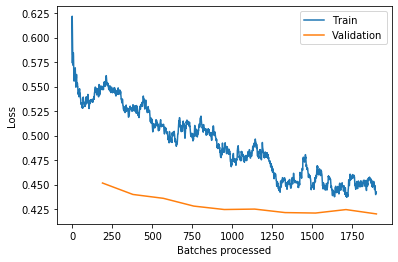

In [80]:
learn.recorder.plot_losses()

In [81]:
learn.fit_one_cycle(10, slice(2e-3/100, 2e-3), wd = 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.491651,0.427178,0.807617,00:47
1,0.494276,0.432113,0.804334,00:43
2,0.473254,0.433276,0.806960,00:45
3,0.472309,0.427583,0.809586,00:47
4,0.451277,0.422035,0.807617,00:47
5,0.449352,0.425011,0.809586,00:45
6,0.421911,0.425715,0.811556,00:47
7,0.445819,0.420823,0.814839,00:45
8,0.416064,0.420648,0.818779,00:48
9,0.410224,0.421482,0.815496,00:50


Better model found at epoch 0 with accuracy value: 0.8076165318489075.
Better model found at epoch 3 with accuracy value: 0.8095863461494446.
Better model found at epoch 6 with accuracy value: 0.8115561604499817.
Better model found at epoch 7 with accuracy value: 0.8148391246795654.
Better model found at epoch 8 with accuracy value: 0.8187787532806396.


In [82]:
learn.load('best_clas')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6090 items)
x: TextList
xxbos in xxup both ' xxunk and times of national emergency . ',xxbos xxunk ok i was n't completely xxunk i may have also been in a food xxunk bc of the xxunk / xxunk / xxunk i also annihilated w / xxunk,xxbos xxmaj ladies here 's how to recover from a # date you totally xxup bombed ... according to men http : / / t.co / xxunk http : / / t.co / xxunk,xxbos xxmaj the xxmaj latest : xxmaj more homes razed by xxmaj northern xxmaj california wildfire : xxmaj the latest on wildfires burning in xxmaj california andû _ http : / / t.co / xxunk,xxbos xxmaj it hurts for me to eat cause i burned my xxunk with a xxunk yesterday !
y: CategoryList
1,0,0,1,0
Path: .;

Valid: LabelList (1523 items)
x: TextList
xxbos xxmaj students at xxmaj xxunk remember xxmaj australian casualties at xxmaj xxunk xxmaj xxunk xxmaj gallipoli 
  http : / / t.co / xxunk via xxunk,xxbos xxmaj israel wrecked my home . xxmaj now it wants my land .

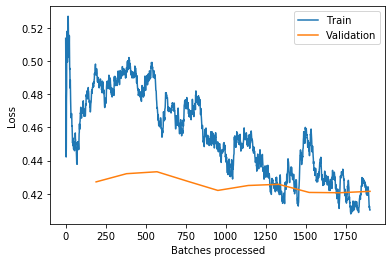

In [83]:
learn.recorder.plot_losses()

In [84]:
d = data_clas.train_ds[0]

In [85]:
learn.predict("aaa")

(Category 0, tensor(0), tensor([0.8236, 0.1764]))

In [86]:
d = TextClasDataBunch.from_csv(dir_pth, 'train.csv', test = 'test.csv',vocab=data_lm.train_ds.vocab, bs=32, text_cols=3, label_cols=4)

In [87]:
len(d.test_ds)

3263

In [88]:
a = test_data.iloc[1, 3]

In [89]:
a

'Heard about #earthquake is different cities, stay safe everyone.'

In [90]:
learn.data.one_item(a)

(tensor([[   2,    5,  413,   75,   13,  320,   26, 1635, 1925, 3135,  749, 1391,
           283,   15]], device='cuda:0'), tensor([0], device='cuda:0'))

In [91]:
def p(x):
    return learn.predict(x)[1].item()

In [92]:
p(a)

1

In [93]:
test_data['label'] = test_data['text'].apply(p)

In [94]:
test_data.head()

,id,keyword,location,text,label
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1


In [95]:
sub = test_data[['id', 'label']]
sub.columns = ['id', 'target']

In [96]:
sub.to_csv('./submissionb.csv', index = None)

In [99]:
!kaggle 

/usr/bin/sh: kaggle: command not found
